In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [ ]:
train_file = "enter location here"
test_file = "enter location here"

In [3]:
#read the csv file
df = pd.read_csv(train_file)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
y = df.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [5]:
columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd',  'GarageArea', 'PoolArea', 'YrSold']

In [6]:
from sklearn.impute import SimpleImputer
inputer = SimpleImputer(missing_values=np.nan, strategy='constant')
inputer = inputer.fit(df[columns].values)
inputed = inputer.transform(df[columns].values)

In [7]:
X = inputed
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(train_X, train_y)

KNeighborsRegressor()

In [9]:
test_data = pd.read_csv(test_file)

In [10]:
from sklearn.impute import SimpleImputer
inputer = SimpleImputer(missing_values=np.nan, strategy='constant')
inputer = inputer.fit(test_data[columns].values)
inputed = inputer.transform(test_data[columns].values)

In [11]:
test_X = inputed
test_preds = model_knn.predict(test_X)

In [12]:
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

In [14]:
def predict(MSSubClass,LotFrontage,LotArea,YearBuilt,OverallQual,YearRemodAdd,GarageArea,PoolArea,YrSold):
    data = [MSSubClass,LotFrontage,LotArea,YearBuilt,OverallQual,YearRemodAdd,GarageArea,PoolArea,YrSold]
    inputer = SimpleImputer(missing_values=np.nan, strategy='constant')
    inputer = inputer.fit(df[columns].values)
    inputed = inputer.transform([data])
    
    pred = model_knn.predict(inputed)
    return pred[0]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy: 0.3333333333333333


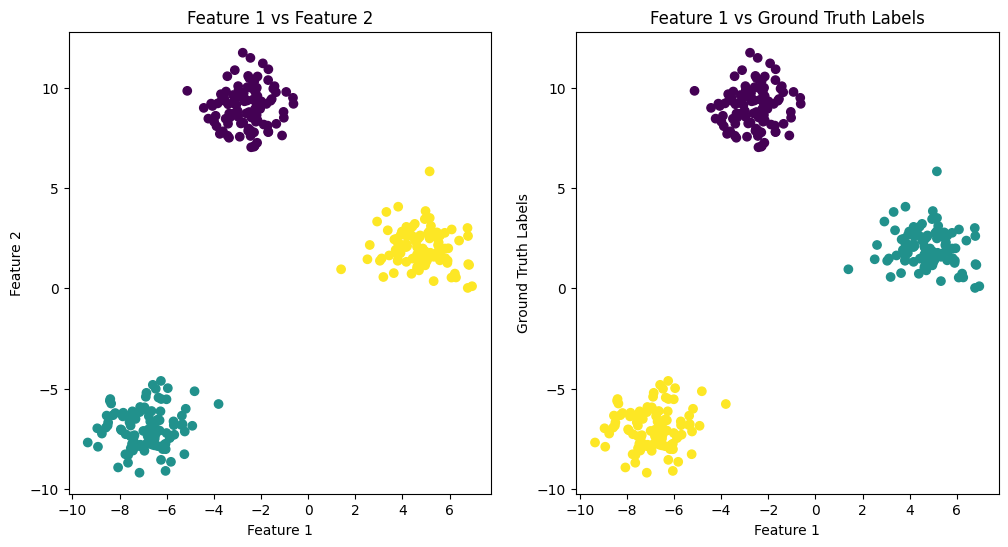

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Assume you have a trained KNN model
# Here, we'll use KMeans for simplicity
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get predicted labels from KMeans clustering
predicted_labels = kmeans.labels_

# Calculate accuracy (useful if you have ground truth labels)
accuracy = accuracy_score(y, predicted_labels)
print(f'Accuracy: {accuracy}')

# Plot the data and clusters
plt.figure(figsize=(12, 6))

# Plot Feature 1 vs Feature 2
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis')
plt.title('Feature 1 vs Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot Feature 1 vs Ground Truth Labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Feature 1 vs Ground Truth Labels')
plt.xlabel('Feature 1')
plt.ylabel('Ground Truth Labels')

plt.show()


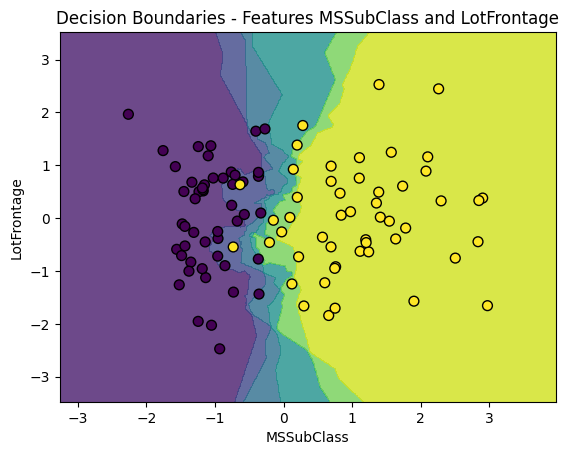

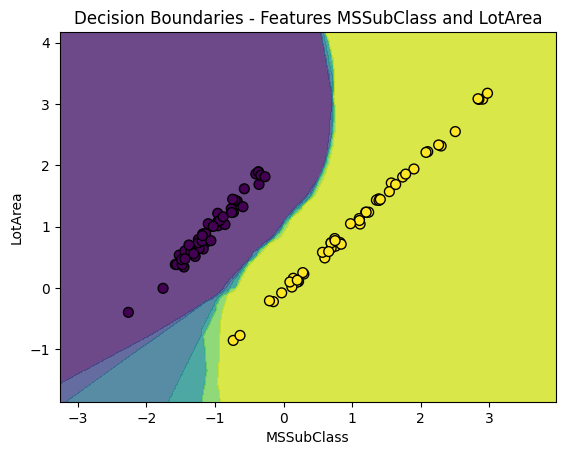

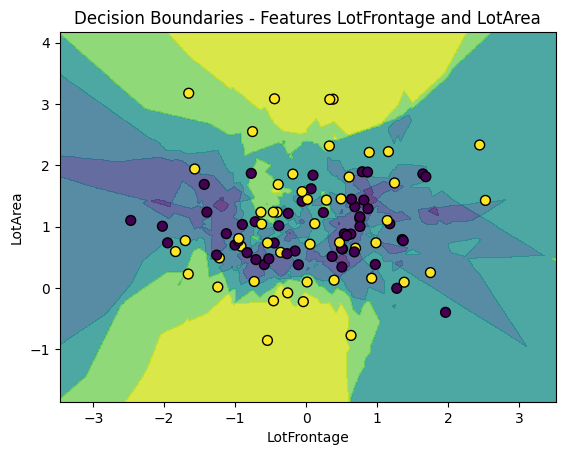

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Assuming model_knn is your trained KNN model with 9 parameters
# If your model is not trained, you should train it first using your data.

# Feature names

# Generate a synthetic dataset for demonstration purposes
X, y = make_classification(n_samples=100, n_features=9, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Define a function to visualize decision boundaries for pairs of features
def plot_decision_boundaries(model, X, y, feature_names, feature_indices):
    # Extract the selected features
    X_subset = X[:, feature_indices]
    
    # Fit the model
    model.fit(X_subset, y)
    
    # Create a meshgrid
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)
    plt.title(f'Decision Boundaries - Features {feature_names[feature_indices[0]]} and {feature_names[feature_indices[1]]}')
    plt.xlabel(feature_names[feature_indices[0]])
    plt.ylabel(feature_names[feature_indices[1]])
    plt.show()

# Create combinations of feature indices for visualization
feature_combinations = list(combinations(range(3), 2))

# Plot decision boundaries for each feature vs correct price
for feature_indices in feature_combinations:
    plot_decision_boundaries(model_knn, X, y, columns, feature_indices)

In [20]:
import gradio as gr


In [21]:
demo = gr.Interface(fn=predict, inputs=[gr.Number(),gr.Number(), gr.Number(), gr.Number(), gr.Number(),gr.Number(), gr.Number(), gr.Number(), gr.Number()], outputs="text")
demo.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/queueing.py", line 495, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/blocks.py", line 1561, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/blocks.py", line 1179, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/